In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('pokemon_data.csv')

In [ ]:
print(data)

In [ ]:
#iterate over a data using for loop
for index, row in data.iterrows():
  print(index,row)
  break


In [ ]:
#user a condition to get a specific row
name_bulbas=data.loc[data['Name']=='Bulbasaur']

In [ ]:
print(name_bulbas)

In [ ]:
#advange filting setup

filter=data.loc[(data['Type 1']=='Grass') & (data['Type 2']=="Poison") ]
print(filter)



In [ ]:
contain=data.loc[data['Name'].str.contains('Mega')]
print(contain)

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
X,y=load_iris(return_X_y=True)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Model=LinearRegression()

In [ ]:
Model.fit(X,y)

LinearRegression()

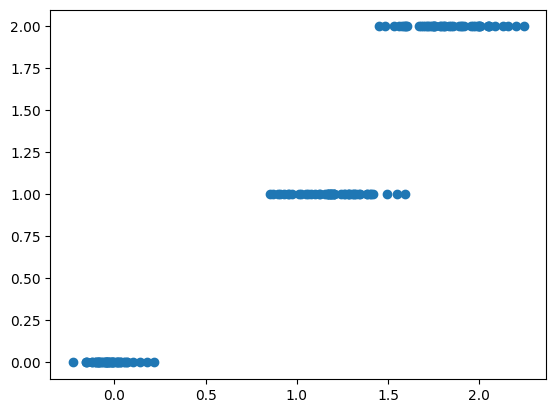

In [ ]:
import matplotlib.pyplot as plt

pred=Model.predict(X)
plt.scatter(pred,y)

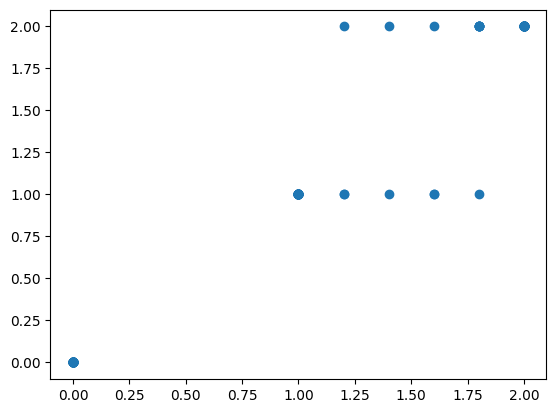

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kneighModel=KNeighborsRegressor()

kneighModel.fit(X,y);
kPredicted=kneighModel.predict(X);
plt.scatter(kPredicted,y);

In [5]:
import pandas as pd

from sklearn.datasets import fetch_openml
df=fetch_openml('titanic',version=1,as_frame=True)['data']


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    object  
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(5), object(6)
memory usage: 115.4+ KB


In [ ]:
df.isnull()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,True,False,True,True,True


In [4]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<Axes: title={'center': 'Missing values in persentage'}, ylabel='percentage'>

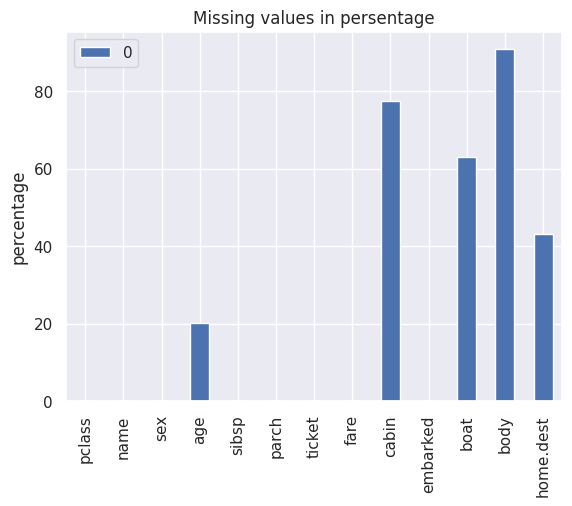

In [6]:
import seaborn as sns

sns.set()
missig_valu=pd.DataFrame((df.isnull().sum()/len(df))*100)
missig_valu.plot(kind='bar',title='Missing values in persentage',ylabel='percentage')

In [ ]:
print(f'size of the dataset: {df.shape}')

size of the dataset: (1309, 13)


In [7]:
df.drop(['body'],axis=1,inplace=True)
print(f'size of the dataset: {df.shape}')

size of the dataset: (1309, 12)


In [8]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')


In [27]:
print(f'The age missing values before:{df.age.isnull().sum()}')

The age missing values before:263


In [9]:
df['age']=imp.fit_transform(df[['age']])

In [30]:
print(f'The age missing values after:{df.age.isnull().sum()}')

The age missing values after:0


In [31]:
print(df.columns)

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'home.dest'],
      dtype='object')


In [13]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,"Montreal, PQ / Chesterville, ON"


<Axes: title={'center': 'Passenger traveled alone'}>

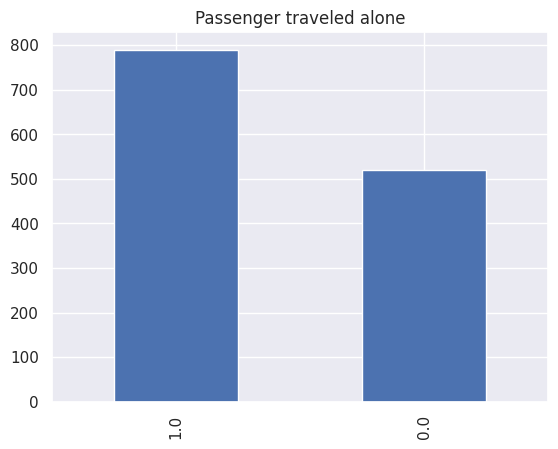

In [10]:
df['family'] =df['sibsp'] + df['parch']
df.loc[df['family']>0 ,'traveled_alone']=0
df.loc[df['family']==0 ,'traveled_alone']=1
df['traveled_alone'].value_counts().plot(title='Passenger traveled alone',kind='bar')


In [33]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,family,traveled_alone
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,"St Louis, MO",0.0,1.0
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",3.0,0.0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,"Montreal, PQ / Chesterville, ON",3.0,0.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,"Montreal, PQ / Chesterville, ON",3.0,0.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,"Montreal, PQ / Chesterville, ON",3.0,0.0


In [11]:
from sklearn.preprocessing import OneHotEncoder

df[['female','male']]=OneHotEncoder().fit_transform(df[['sex']]).toarray()
df[['sex','female','male']]

,sex,female,male
0,female,1.0,0.0
1,male,0.0,1.0
2,female,1.0,0.0
3,male,0.0,1.0
4,female,1.0,0.0
...,...,...,...
1304,female,1.0,0.0
1305,female,1.0,0.0
1306,male,0.0,1.0
1307,male,0.0,1.0


In [21]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,family,traveled_alone,female,male
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,"St Louis, MO",0.0,1.0,1.0,0.0
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",3.0,0.0,0.0,1.0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,"Montreal, PQ / Chesterville, ON",3.0,0.0,1.0,0.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,"Montreal, PQ / Chesterville, ON",3.0,0.0,0.0,1.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,"Montreal, PQ / Chesterville, ON",3.0,0.0,1.0,0.0


In [35]:
# df['sex']=OneHotEncoder().fit_transform(df[['sex']]).toarray()[:,1]
instance=OneHotEncoder().fit_transform(df[['sex']]).toarray()
print(instance)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [12]:
instance=OneHotEncoder().fit_transform(df[['sex']]).toarray()[:,1]
df['sex']=instance

In [40]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,family,traveled_alone,female,male
0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,"St Louis, MO",0.0,1.0,1.0,0.0
1,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",3.0,0.0,0.0,1.0
2,1.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,"Montreal, PQ / Chesterville, ON",3.0,0.0,1.0,0.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,"Montreal, PQ / Chesterville, ON",3.0,0.0,0.0,1.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,"Montreal, PQ / Chesterville, ON",3.0,0.0,1.0,0.0


In [2]:
from sklearn.preprocessing import StandardScaler


In [14]:
num_cols= df.select_dtypes(include=['int64','int32','float64']).columns
print(num_cols)

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'family',
       'traveled_alone', 'female', 'male'],
      dtype='object')


In [16]:
ss=StandardScaler()

df[num_cols]=ss.fit_transform(df[num_cols])
df[num_cols].describe()

,pclass,sex,age,sibsp,parch,fare,family,traveled_alone,female,male
count,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.308000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03
mean,-1.737003e-16,9.770641e-17,1.519878e-16,-8.142201e-18,1.628440e-17,-8.691654e-17,1.357033e-17,6.513761e-17,-9.770641e-17,9.770641e-17
std,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00
min,-1.546098e+00,-1.344995e+00,-2.307330e+00,-4.790868e-01,-4.449995e-01,-6.435292e-01,-5.583461e-01,-1.233758e+00,-7.434969e-01,-1.344995e+00
25%,-3.520907e-01,-1.344995e+00,-6.119712e-01,-4.790868e-01,-4.449995e-01,-4.909206e-01,-5.583461e-01,-1.233758e+00,-7.434969e-01,-1.344995e+00
50%,8.419164e-01,7.434969e-01,2.758687e-16,-4.790868e-01,-4.449995e-01,-3.641609e-01,-5.583461e-01,8.105319e-01,-7.434969e-01,7.434969e-01
75%,8.419164e-01,7.434969e-01,3.974806e-01,4.812878e-01,-4.449995e-01,-3.905147e-02,7.335229e-02,8.105319e-01,1.344995e+00,7.434969e-01
max,8.419164e-01,7.434969e-01,3.891737e+00,7.203909e+00,9.956864e+00,9.258680e+00,5.758637e+00,8.105319e-01,1.344995e+00,7.434969e-01


In [17]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
df[num_cols]=minmax.fit_transform(df[num_cols])

In [20]:
df[num_cols]

,pclass,sex,age,sibsp,parch,fare,family,traveled_alone,female,male
0,0.0,0.0,0.361169,0.000,0.000000,0.412503,0.0,1.0,1.0,0.0
1,0.0,1.0,0.009395,0.125,0.222222,0.295806,0.3,0.0,0.0,1.0
2,0.0,0.0,0.022964,0.125,0.222222,0.295806,0.3,0.0,1.0,0.0
3,0.0,1.0,0.373695,0.125,0.222222,0.295806,0.3,0.0,0.0,1.0
4,0.0,0.0,0.311064,0.125,0.222222,0.295806,0.3,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1304,1.0,0.0,0.179540,0.125,0.000000,0.028213,0.1,0.0,1.0,0.0
1305,1.0,0.0,0.372206,0.125,0.000000,0.028213,0.1,0.0,1.0,0.0
1306,1.0,1.0,0.329854,0.000,0.000000,0.014102,0.0,1.0,0.0,1.0
1307,1.0,1.0,0.336117,0.000,0.000000,0.014102,0.0,1.0,0.0,1.0


In [21]:
import numpy as np

In [31]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,1])

w=np.array([1,1])
b=-0.5

pred=[]

for a in x:
  y_hat=np.dot(a,w)+b
  pred.append(activation(y_hat))

In [32]:
pred

[0, 1, 1, 1]

In [30]:
def activation(z):
  if z>=0:
    return 1
  else:
      return 0

Perceptron learning


In [33]:
import math
import numpy as np


In [34]:
epochs =100
alpha=0.2

In [35]:
w0=np.random.random()
w1=np.random.random()
w2=np.random.random()
print('intial Weights:')
print('w0:',w0)
print('w1:',w1)
print('w2:',w2)

intial Weights:
w0: 0.23810274433540835
w1: 0.08036534263667272
w2: 0.09641866611845173


In [36]:
del_w0=1
del_w1=1
del_w2=1

In [37]:
train_data_temp=[[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]]
op=np.array([0,1,1,1,1,1,1,1])
train_data=np.array(train_data_temp)

In [ ]:
bias=0
for i in range(epochs):
    j=0
    for x in train_data:
      y_hat= w0*x[0]+w1*x[1]+w2*x[2]+ bias
      if(y_hat>=0):
        act=1
      else:
        act=0
      err =op[j]-act
      del_w0=alpha*x[0]*err
      del_w1=alpha*x[1]*err
      del_w2=alpha*x[2]*err

      w0=w0+del_w0
      w1=w1+del_w1
      w=w2+del_w2

      j=j+1
      print('epoch:',i+1,"errpr:",err)
      print(del_w0,del_w1,del_w2)

      print('\nFinal weight: ')
      print('W0:',w0,'W1:',w1,'W2:',w2)
